In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

# Preprocessing The data Training

In [2]:
li = ["Nayeem", "Sai"]
images_final_Train = []
images_labels_Train = []
for i in range(len(li)):
    #print(li[i])
    images = [img for img in os.listdir("C://Users//SUPERMAN//Desktop//hand//verfi//Train"+"//"+li[i]+"//") if img.endswith(".jpg")]
    #print(images)
    for image_li in range(len(images)):
        img = Image.open("C://Users//SUPERMAN//Desktop//hand//verfi//Train"+"//"+li[i]+"//"+str(images[image_li])).convert('L')
        #print("path", r"C:\Users\SUPERMAN\Desktop\hand\Elephant\\"+li[i]+"//"+str(images[image_li]))
        resize_image = img.resize((105, 105), Image.ANTIALIAS)
        imag = np.array(resize_image)
        images_final_Train.append(imag)
        label = li[i].lower()
        #print(label)
        if label.startswith("n"):
            #print(images[image_li])
            images_labels_Train.append(1)
        else:
            #print(images[image_li])
            images_labels_Train.append(0)

In [3]:
images_final_Train = np.asarray(images_final_Train)
images_labels_Train = np.asarray(images_labels_Train, dtype=np.uint8)
#print(images_final)
#print(images_labels)
#images_final
images_labels_Train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

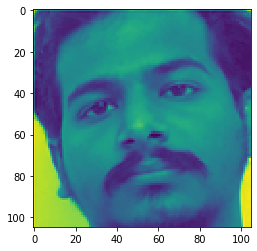

1


In [4]:
plt.imshow(images_final_Train[1])
plt.show()
print(images_labels_Train[1])

In [5]:
li = ["Nayeem", "Sai"]
images_final_Test = []
images_labels_Test = []
for i in range(len(li)):
    #print(li[i])
    images = [img for img in os.listdir("C://Users//SUPERMAN//Desktop//hand//verfi//Test"+"//"+li[i]+"//") if img.endswith(".jpg")]
    #print(images)
    for image_li in range(len(images)):
        img = Image.open("C://Users//SUPERMAN//Desktop//hand//verfi//Test"+"//"+li[i]+"//"+str(images[image_li])).convert('L')
        #print("path", r"C:\Users\SUPERMAN\Desktop\hand\Elephant\\"+li[i]+"//"+str(images[image_li]))
        resize_image = img.resize((105, 105), Image.ANTIALIAS)
        imag = np.array(resize_image)
        images_final_Test.append(imag)
        label = li[i].lower()
        #print(label)
        if label.startswith("n"):
            #print(images[image_li])
            images_labels_Test.append(1)
        else:
            #print(images[image_li])
            images_labels_Test.append(0)

In [6]:
images_final_Test = np.asarray(images_final_Test).astype(np.float)
images_labels_Test = np.asarray(images_labels_Test, dtype=np.uint8)
#print(images_final)
#print(images_labels)
#images_final
images_labels_Test

array([1, 1, 1, 1, 0, 0, 0, 0], dtype=uint8)

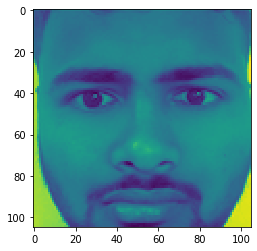

0


In [7]:
plt.imshow(images_final_Test[7])
plt.show()
print(images_labels_Test[7])

In [8]:
imag.shape

(105, 105)

In [9]:
X_train = images_final_Train
y_train = images_labels_Train

X_test = images_final_Test
y_test = images_labels_Test

In [10]:
def make_pairs(x, y):
    
    print(y)
    print(len(x))
    num_classes = max(y) + 1
    print(num_classes)
    
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]
    
    """digit_indices = []
    for i in range(num_classes):
        print("i", i)
        digit_indices.append(np.where((y==i)[0]))
        print(type(y[0]), type(i), (y==1))"""
    
    print(digit_indices)
    
    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        #print(idx1)
        #print(x1)
        #print("y", y[idx1])
        label1 = y[idx1]
        print("label", digit_indices[label1])
        #print(digit_indices[label1])
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        #print(x2)
        
        #print("x1 = ", x1, "x2 =", x2, "label1 =", label1, "idx2 =", idx2)
        pairs += [[x1, x2]]
        labels += [1]
        
        #print("pairs = ", pairs, "labels =", labels)
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(X_train, y_train)
pairs_test, labels_test = make_pairs(X_test, y_test)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
16
2
[array([ 8,  9, 10, 11, 12, 13, 14, 15], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)]
label [0 1 2 3 4 5 6 7]
label [0 1 2 3 4 5 6 7]
label [0 1 2 3 4 5 6 7]
label [0 1 2 3 4 5 6 7]
label [0 1 2 3 4 5 6 7]
label [0 1 2 3 4 5 6 7]
label [0 1 2 3 4 5 6 7]
label [0 1 2 3 4 5 6 7]
label [ 8  9 10 11 12 13 14 15]
label [ 8  9 10 11 12 13 14 15]
label [ 8  9 10 11 12 13 14 15]
label [ 8  9 10 11 12 13 14 15]
label [ 8  9 10 11 12 13 14 15]
label [ 8  9 10 11 12 13 14 15]
label [ 8  9 10 11 12 13 14 15]
label [ 8  9 10 11 12 13 14 15]
[1 1 1 1 0 0 0 0]
8
2
[array([4, 5, 6, 7], dtype=int64), array([0, 1, 2, 3], dtype=int64)]
label [0 1 2 3]
label [0 1 2 3]
label [0 1 2 3]
label [0 1 2 3]
label [4 5 6 7]
label [4 5 6 7]
label [4 5 6 7]
label [4 5 6 7]


In [11]:
pairs_test.shape, labels_test.shape, pairs_train.shape, labels_train.shape

((16, 2, 105, 105), (16,), (32, 2, 105, 105), (32,))

(2, 105, 105)


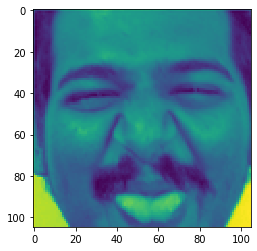

1


In [12]:
print(pairs_test[0].shape)

plt.imshow(pairs_train[11, 0])
plt.show()
print(labels_train[6])


# Model Creation

In [13]:

import tensorflow
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate, Lambda
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend  as K
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.regularizers import l2, l1

In [14]:
def initialize_weights(shape, name=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

In [15]:
def initialize_bias(shape, name=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

In [22]:
def face_one_shot(input_shape=(105, 105, 1)):

    input1 = Input(input_shape)
    input2 = Input(input_shape)
    
    model = Sequential()
    
    model.add(Conv2D(64, (10, 10), activation='relu', input_shape = input_shape, 
                    kernel_initializer=tensorflow.keras.initializers.he_normal(seed=10), kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Conv2D(128, (7, 7), activation='relu', kernel_initializer=tensorflow.keras.initializers.he_normal(seed=10),kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Conv2D(128, (4, 4), activation='relu', kernel_initializer=tensorflow.keras.initializers.he_normal(seed=10),kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Conv2D(256, (4, 4), activation='relu', kernel_initializer=tensorflow.keras.initializers.he_normal(seed=10),kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Flatten())
    
    model.add(Dense(4096,  activation='sigmoid'))
    
    encode_l = model(input1)
    encode_r = model(input2)
    
        
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encode_l, encode_r])
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    
    face_verifinet = Model([input1, input2], prediction)
    
    return face_verifinet

In [23]:
model = face_one_shot(input_shape=(105, 105, 1))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         10636096    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[1][0]         

In [24]:
optimizer = tensorflow.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=1e-6, amsgrad=False)

model.compile(loss = "binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [26]:
"""history = model.fit([np.expand_dims(pairs_train[:, 0], axis=-1), 
           np.expand_dims(pairs_train[:, 1], axis=-1)], 
           labels_train[:], batch_size=16,epochs=50)"""

model.fit([np.expand_dims(pairs_train[:, 0]//255, axis=-1), 
           np.expand_dims(pairs_train[:, 1]//255, axis=-1)], 
           labels_train[:], batch_size = 16,
          nb_epoch = 50, verbose = 2, validation_data = ([np.expand_dims(pairs_test[:, 0]//255, axis=-1), 
           np.expand_dims(pairs_test[:, 1]//255, axis=-1)], 
           labels_test[:]))


Train on 32 samples, validate on 16 samples
Epoch 1/50
32/32 - 3s - loss: 0.7129 - accuracy: 0.5000 - val_loss: 0.7100 - val_accuracy: 0.5000
Epoch 2/50
32/32 - 1s - loss: 0.7096 - accuracy: 0.5000 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 3/50
32/32 - 1s - loss: 0.7070 - accuracy: 0.3750 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 4/50
32/32 - 1s - loss: 0.7045 - accuracy: 0.5000 - val_loss: 0.7029 - val_accuracy: 0.5000
Epoch 5/50
32/32 - 1s - loss: 0.7026 - accuracy: 0.3750 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 6/50
32/32 - 1s - loss: 0.7005 - accuracy: 0.5000 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 7/50
32/32 - 1s - loss: 0.6989 - accuracy: 0.5000 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 8/50
32/32 - 1s - loss: 0.6978 - accuracy: 0.5000 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 9/50
32/32 - 1s - loss: 0.6970 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 10/50
32/32 - 1s - loss: 0.6963 - accuracy: 0.5000 - val_loss: 0.695

In [27]:
#from tensorflow.keras.preprocessing import Image

#image = Image.load_img(pairs_train[8, 1])

#model.predict(pairs_train[8, 1])

img = np.reshape(pairs_test[2, 1].astype(float), (-1, 105, 105, 1))
#img2 = np.expand_dims(pairs_train[8, 0], axis=-1)
img2 = np.reshape(pairs_test[2, 1].astype(float), (-1, 105, 105, 1))
img.shape
model.predict([img,img2] )

array([[0.49939403]], dtype=float32)

In [28]:
model.save("Face_verification_model.hdf5")